In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from math import pi, ceil
plt.style.use('seaborn')
sns.set_style("whitegrid")

import urllib.request
from nltk.tokenize import RegexpTokenizer

import re
import random
import numpy as np
import pandas as pd
import random
import math
import itertools
import multiprocessing
from tqdm import tqdm
import logging
import pickle

from scipy.sparse.linalg import svds,eigs
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances

import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models.callbacks import CallbackAny2Vec
from scipy import stats

from time import time
import warnings
warnings.filterwarnings(action='ignore')

import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GIUCO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
track = pd.read_csv('tracks.csv')
track = pd.DataFrame(track)
print(track.shape)
track.head()

(1472, 22)


,Unnamed: 0,id,artist_name,track_name,album_name,artist_genre,release_date,artist_popularity,track_popularity,artist_followers,...,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,3nqQXoyQOWXiESFLlDF1hG,Sam Smith,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),"['dance pop', 'pop', 'uk pop']",2022-09-22,88,100,20816519,...,2,-7.375,0.0864,0.01300,0.000005,0.266,0.238,131.121,156943,4
1,1,0V3wPSX9ygBnCm8psDIegu,Taylor Swift,Anti-Hero,Midnights,['pop'],2022-10-21,100,97,62687649,...,4,-6.571,0.0519,0.13000,0.000002,0.142,0.533,97.008,200690,4
2,2,1bDbXMyjaUIooNwFE9wn0N,Drake,Rich Flex,Her Loss,"['canadian hip hop', 'canadian pop', 'hip hop'...",2022-11-04,97,95,69088297,...,11,-9.342,0.2440,0.05030,0.000002,0.355,0.424,153.150,239360,3
3,3,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,"['colombian pop', 'latin pop', 'reggaeton', 'r...",2022-05-26,84,97,10812997,...,7,-5.329,0.0364,0.58300,0.000002,0.218,0.850,124.980,162638,4
4,4,4uUG5RXrOk84mYEfFvj3cK,David Guetta,I'm Good (Blue),I'm Good (Blue),"['big room', 'dance pop', 'edm', 'pop', 'pop d...",2022-08-26,88,97,25038984,...,7,-3.673,0.0343,0.00383,0.000007,0.371,0.304,128.040,175238,4


In [3]:
df = pd.DataFrame(track)

# Consider this random sample as the playlist of certain user
user_play = df.sample(n=20)
user_play.shape

(20, 22)

In [4]:
user_play

,Unnamed: 0,id,artist_name,track_name,album_name,artist_genre,release_date,artist_popularity,track_popularity,artist_followers,...,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1376,1451,1nwkSqzTyXBk6XF796EOav,"Tyler, The Creator",Yonkers,Goblin,"['hip hop', 'rap']",2011-05-09,83,64,9938502,...,11,-5.397,0.3340,0.016100,0.080800,0.2170,0.7380,79.102,249333,4
774,785,4sebUbjqbcgDSwG6PbSGI0,Cage The Elephant,Come a Little Closer,Melophobia,"['modern rock', 'punk blues', 'rock']",2013-10-08,73,73,3049879,...,1,-1.786,0.0327,0.026500,0.000001,0.1510,0.3040,148.038,229347,4
424,426,5t2EOrgbyupZmjFUROk1E0,Ethan Beckett,Life From Above,Life From Above,['sleep'],2022-09-04,47,64,120,...,7,-36.019,0.0471,0.938000,0.699000,0.1010,0.0332,138.625,145610,4
312,314,70LcF31zb1H0PyJoS1Sx1r,Radiohead,Creep,Pablo Honey,"['alternative rock', 'art rock', 'melancholia'...",1993-02-22,78,85,7570874,...,7,-9.935,0.0372,0.009700,0.000133,0.1290,0.1040,91.844,238640,4
441,443,3gGMsx3jxYKfhXq8LMj1tz,Crystal Castles,Vanished,Crystal Castles,"['alternative dance', 'bitpop', 'digital hardc...",2008-03-16,68,62,1337797,...,0,-6.660,0.0298,0.001840,0.000067,0.2920,0.6690,119.979,242960,4
1445,1543,4XLLdFJdwmvdtkwQuXAFut,Ian,La san,La san,['romanian trap'],2022-04-12,61,56,285300,...,5,-9.650,0.0644,0.047400,0.000134,0.1100,0.6320,94.014,207435,4
397,399,3qNtyx6HFRRFsj4wF5vslr,Ronja Mair,Nightrain,Fauna,[],2022-10-04,48,66,6,...,5,-35.249,0.0419,0.994000,0.933000,0.0935,0.0400,72.367,156203,4
821,835,7mwLlFNlWD4AOFoxPJTPwn,Her's,Speed Racer,Songs of Her's,"['indie garage rock', 'indie pop', 'liverpool ...",2017-05-12,63,56,639614,...,6,-2.497,0.0463,0.010200,0.325000,0.0463,0.9710,92.487,151722,4
1334,1396,4pH8cIlMI9NrTWcDiQbuRe,Oliver Tree,Miss You - Sped Up Version,Miss You (Sped Up Version),['alternative hip hop'],2022-10-17,81,83,1996229,...,0,-10.692,0.0877,0.014100,0.018500,0.1560,0.2830,173.979,171702,4
944,970,0NJC0FDCODpPUntRTTQq97,Aerosmith,Cryin',Get A Grip,"['album rock', 'classic rock', 'hard rock', 'r...",1993-01-01,76,71,12796966,...,9,-3.674,0.0327,0.000202,0.010100,0.3670,0.4860,105.872,308333,3


In [5]:
x_df = df[['danceability', 'energy', 'acousticness', 'valence', 'tempo']].values 
x_user = user_play[['danceability', 'energy','acousticness', 'valence', 'tempo']].values 
min_max_scaler = MinMaxScaler()
x_df_scaled = min_max_scaler.fit_transform(x_df)
x_user_scaled = min_max_scaler.fit_transform(x_user)

columns_scaled = ['danceability_scaled', 'energy_scaled', 'acousticness_scaled','valence_scaled', 'tempo_scaled']

df = pd.DataFrame(x_df_scaled, columns=columns_scaled)
user = pd.DataFrame(x_user_scaled, columns=columns_scaled)

In [6]:
n_clusters = range(2,21)
ssd = []
sc = []

for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(x_df_scaled)
    preds = km.predict(x_df_scaled) 
    centers = km.cluster_centers_ 
    ssd.append(km.inertia_) 
    score = silhouette_score(x_df_scaled, preds, metric='euclidean')
    sc.append(score)
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))



Number of Clusters = 2, Silhouette Score = 0.48752690810788696
Number of Clusters = 3, Silhouette Score = 0.2928712308521711
Number of Clusters = 4, Silhouette Score = 0.2885316656631413
Number of Clusters = 5, Silhouette Score = 0.22344365108035988
Number of Clusters = 6, Silhouette Score = 0.22456110027038428
Number of Clusters = 7, Silhouette Score = 0.2138941977414381
Number of Clusters = 8, Silhouette Score = 0.2135456224665407
Number of Clusters = 9, Silhouette Score = 0.2058670170159938
Number of Clusters = 10, Silhouette Score = 0.22020433662635913
Number of Clusters = 11, Silhouette Score = 0.20490688851121866
Number of Clusters = 12, Silhouette Score = 0.20410680548259583
Number of Clusters = 13, Silhouette Score = 0.2004038748149644
Number of Clusters = 14, Silhouette Score = 0.20216012382770898
Number of Clusters = 15, Silhouette Score = 0.2014019752822215
Number of Clusters = 16, Silhouette Score = 0.19547253477567078
Number of Clusters = 17, Silhouette Score = 0.197965867

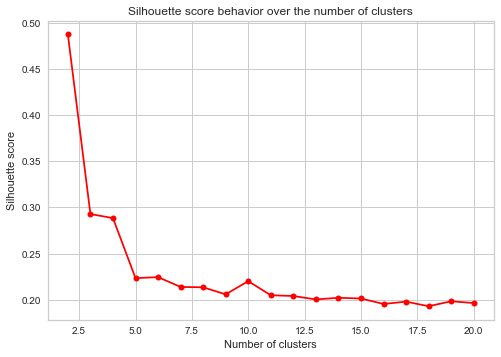

In [7]:
plt.plot(n_clusters, sc, marker='.', markersize=12, color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score behavior over the number of clusters')
plt.show()


In [8]:
for n, s in zip(n_clusters, ssd):
    print('Number of Clusters = {}, Sum of Squared Distances = {}'.format(n, s))


Number of Clusters = 2, Sum of Squared Distances = 224.61587875836005
Number of Clusters = 3, Sum of Squared Distances = 169.61948959534183
Number of Clusters = 4, Sum of Squared Distances = 144.35619850126048
Number of Clusters = 5, Sum of Squared Distances = 130.28065825006783
Number of Clusters = 6, Sum of Squared Distances = 120.76819135823119
Number of Clusters = 7, Sum of Squared Distances = 111.71236299090951
Number of Clusters = 8, Sum of Squared Distances = 104.84777646801862
Number of Clusters = 9, Sum of Squared Distances = 99.6697036649787
Number of Clusters = 10, Sum of Squared Distances = 94.31949877414394
Number of Clusters = 11, Sum of Squared Distances = 90.66117408144362
Number of Clusters = 12, Sum of Squared Distances = 86.86144167488874
Number of Clusters = 13, Sum of Squared Distances = 84.097869196203
Number of Clusters = 14, Sum of Squared Distances = 81.98269906543347
Number of Clusters = 15, Sum of Squared Distances = 78.43116614997285
Number of Clusters = 16,

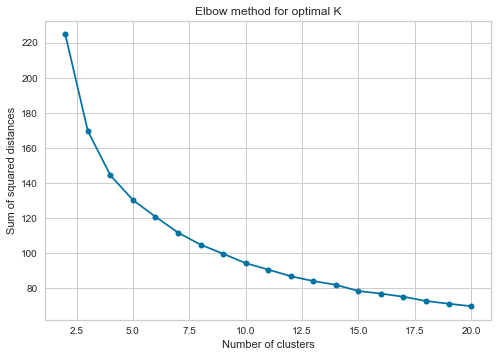

In [9]:
plt.plot(n_clusters, ssd, marker='.', markersize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()


In [10]:
k=6
model = KMeans(n_clusters=k, random_state=42).fit(x_df_scaled)
pred = model.predict(x_df_scaled)
print('10 first clusters: ', model.labels_[:10])


10 first clusters:  [3 4 3 2 4 2 4 2 3 4]


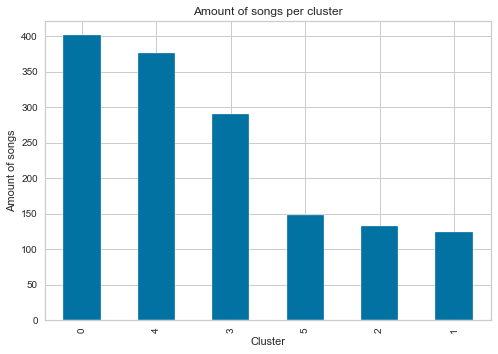

In [11]:

df['cluster'] = model.labels_

df['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')
plt.show()


In [12]:
df_songs_joined = pd.concat([df,track], axis=1).set_index('cluster')

for cluster in range(k):
    display(df_songs_joined.loc[cluster, ['artist_name','track_name']].sample(frac=1).head(10))


,artist_name,track_name
cluster,,
0,20 Fingers,Short Dick Man - Club Mix
0,なとり,Overdose
0,Nek,"Cate Una, Cate Doua"
0,Arctic Monkeys,Cornerstone
0,1nonly,Kiss
0,Papa Roach,Last Resort
0,Mr. Juve,"Misca, Misca Din Buric"
0,SEKAI NO OWARI,Habit
0,One Direction,One Thing


,artist_name,track_name
cluster,,
1,Leonid Antonov,Atwined
1,Hema,Within
1,Somaya Kudri,Flow State
1,Gemma Casimaty,Nightbird
1,Minja Nielsen,Light Sleeper
1,Sohn Aelia,Herinneringen
1,La-Mu,Sedang Tidur
1,Yeur,Tundra
1,Sleeping Luna,The Sea Of Tranquility


,artist_name,track_name
cluster,,
2,Geany Morandi,Fac Bani Si In Himalaya
2,Vlad Dobrescu,Globul De Cristal
2,Punto40,Mini Mini
2,Watashi Kobayashi,villain (Cover)
2,347aidan,Dancing in My Room
2,Watashi Kobayashi,HAPPY JAM JAM (Cover)
2,Shotgun Willy,Master Sword
2,PinkPantheress,Just for me
2,RAVA,BULIBA$HA


,artist_name,track_name
cluster,,
3,EST Gee,Backstage Passes (feat. Jack Harlow)
3,Scorpions,Still Loving You
3,The Neighbourhood,Softcore
3,Scorpions,Follow Your Heart
3,Trevor Something,The Ghost
3,Depeche Mode,Enjoy the Silence - 2006 Remaster
3,Lazy3x,2K FREESTYLE
3,Gucci Mane,Letter to Takeoff
3,Roxette,Listen To Your Heart


,artist_name,track_name
cluster,,
4,girl in red,bad idea!
4,Red Hot Chili Peppers,Tell Me Baby
4,Mitski,Washing Machine Heart
4,Meghan Trainor,NO
4,The Drums,Money
4,KUTE,Dead on Arrival
4,Eve,Kaikai Kitan
4,Moneybagg Yo,Blow
4,Liviu Guta,Buna Dimineata


,artist_name,track_name
cluster,,
5,TK from Ling tosite sigure,white silence (album version)
5,Connect-R,Daca Dragostea Dispare
5,Aimer,April Showers
5,Disturbed,The Sound of Silence
5,New West,Those Eyes
5,Petre Stefan,Sânge pe pat și pe podea
5,Scorpions,House of Cards
5,Steve Lacy,Static
5,Tom Odell,Another Love


In [13]:

df_radar = df.groupby('cluster').mean().reset_index()
df_radar

,cluster,danceability_scaled,energy_scaled,acousticness_scaled,valence_scaled,tempo_scaled
0,0,0.379544,0.806538,0.082600,0.818327,0.634683
1,1,0.296993,0.033467,0.958252,0.090467,0.430348
2,2,0.346182,0.679626,0.452069,0.724798,0.606995
3,3,0.419483,0.567858,0.112033,0.295846,0.601780
4,4,0.387507,0.830599,0.049677,0.481335,0.600523
5,5,0.355761,0.422066,0.672289,0.344804,0.538845


In [14]:
def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the radar plot
    #ax = plt.subplot(4,ceil(num_clusters/4),row+1, polar=True, )
    ax = plt.subplot(2,ceil(num_clusters/2),row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)



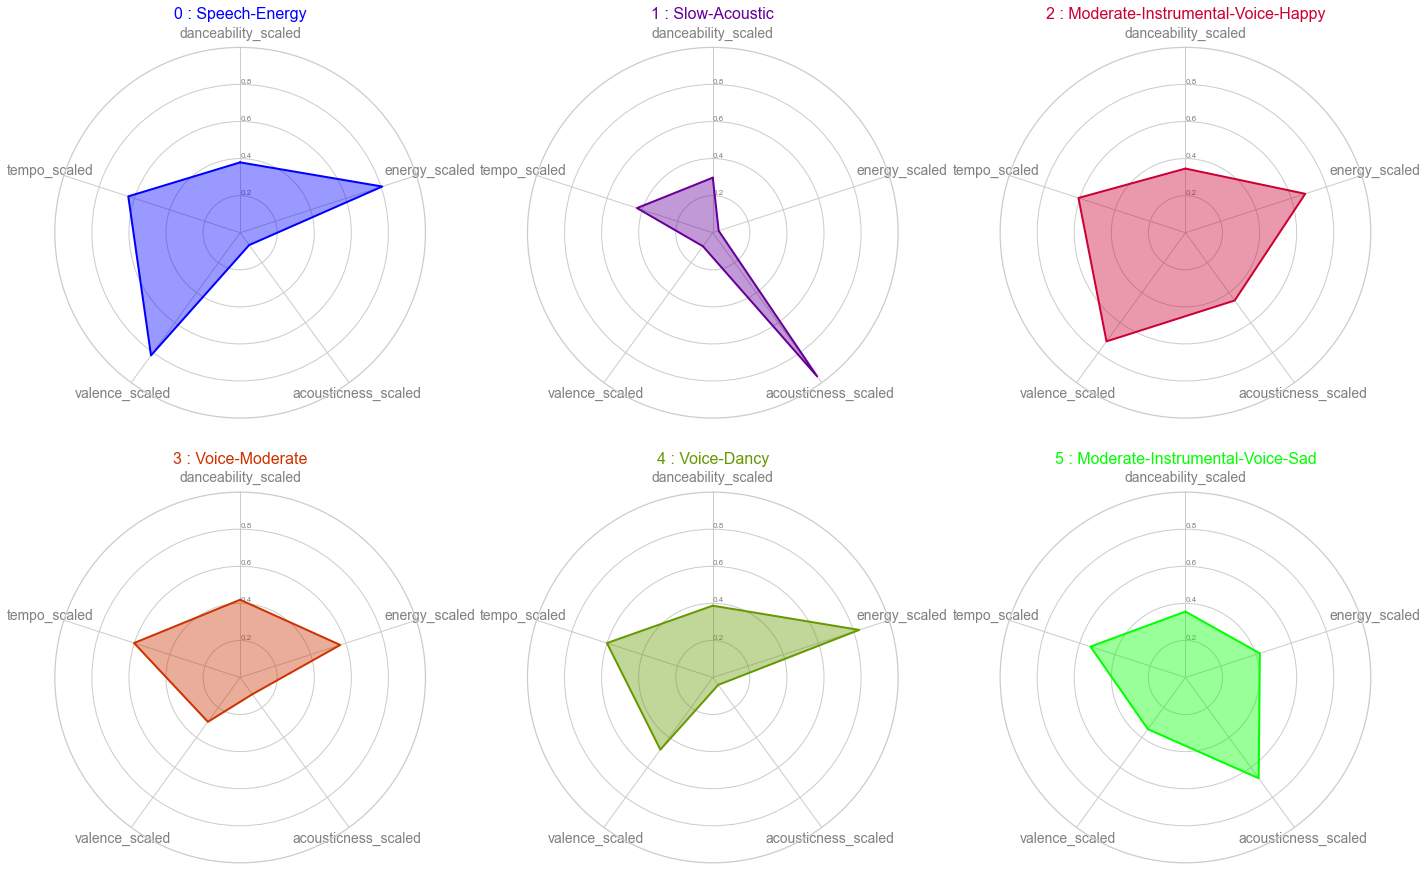

In [15]:
# initialize the figure
plt.figure(figsize=(24,15))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("brg", len(df_radar.index))

# Create cluster name
title_list = ['Speech-Energy', 'Slow-Acoustic', 'Moderate-Instrumental-Voice-Happy', 'Voice-Moderate', 
              'Voice-Dancy', 'Moderate-Instrumental-Voice-Sad']

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=str(df_radar['cluster'][row]) + ' : ' + title_list[row], 
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))


0.8746818545543509


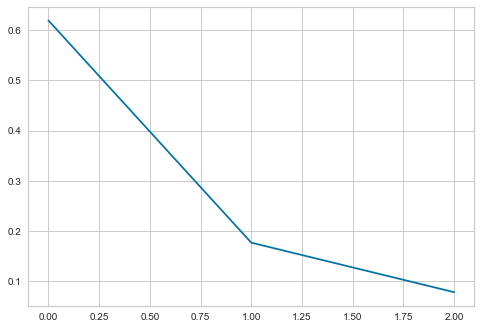

In [16]:
pca = PCA(n_components=3, random_state=42)
songs_pca = pca.fit_transform(x_df_scaled)
print(pca.explained_variance_ratio_.sum())
plt.plot(pca.explained_variance_ratio_)

In [17]:
df_pca = pd.DataFrame(songs_pca, columns=['C1', 'C2', 'C3'])
df_pca['cluster'] = model.labels_
minor_cluster = df['cluster'].value_counts().tail(1)
sampled_clusters_pca = pd.DataFrame()

for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()



3    124
4    124
2    124
0    124
5    124
1    124
Name: cluster, dtype: int64

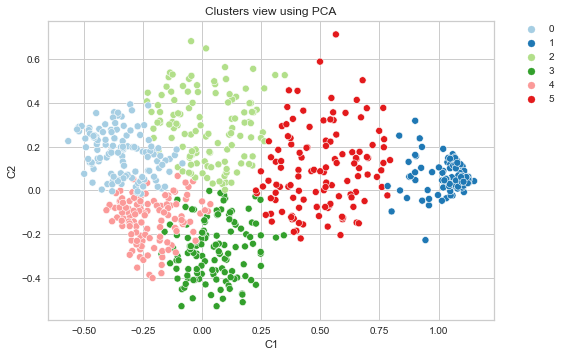

In [18]:
sns.scatterplot(x='C1', y='C2', hue='cluster', data=sampled_clusters_pca, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()


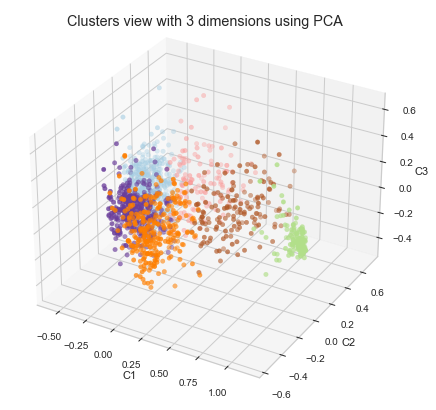

In [19]:
fig = plt.figure()
fig.suptitle('Clusters view with 3 dimensions using PCA')
ax = Axes3D(fig)

ax.scatter(df_pca['C1'], df_pca['C2'], df_pca['C3'],
           c=df_pca['cluster'], cmap='Paired')

ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('C3')
plt.show()


In [20]:
user_pred = model.predict(x_user_scaled)
print('User Playlist clusters: ', user_pred)


User Playlist clusters:  [0 4 1 3 4 4 1 0 3 4 4 0 1 4 3 3 2 1 4 2]


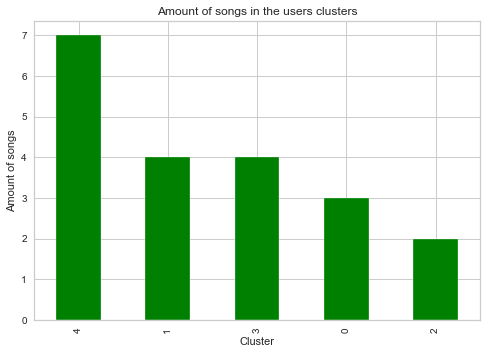

In [21]:
user_cluster = pd.DataFrame(x_user_scaled, columns=columns_scaled)
user_cluster['cluster'] = user_pred

user_cluster['cluster'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs in the users clusters')
plt.show()


In [22]:
user_play_r = user_play.reset_index(drop=True)
df_user_songs_joined = pd.concat([user_cluster,user_play_r], axis=1).set_index('cluster')
for cluster in user_cluster['cluster'].unique():
    display(df_user_songs_joined.loc[cluster, ['artist_name','track_name']].sample(frac=1))


,artist_name,track_name
cluster,,
0,Sak Noel,Loca People - Radio Edit
0,"Tyler, The Creator",Yonkers
0,Her's,Speed Racer


,artist_name,track_name
cluster,,
4,Crystal Castles,Vanished
4,NEFFEX,Go!
4,1nonly,Shakira!
4,Aerosmith,Cryin'
4,Aimer,残響散歌
4,Cage The Elephant,Come a Little Closer
4,Ian,La san


,artist_name,track_name
cluster,,
1,Ethan Beckett,Life From Above
1,Ronja Mair,Nightrain
1,Sergei Rachmaninoff,"Prélude in C-Sharp Minor, Op. 3, No. 2"
1,Zawar Hagano,Fading Memories


,artist_name,track_name
cluster,,
3,Oliver Tree,Miss You - Sped Up Version
3,Radiohead,Creep
3,Drake,Pussy & Millions (feat. Travis Scott)
3,Lazy3x,2K FREESTYLE


,artist_name,track_name
cluster,,
2,XANAKIN SKYWOK,Diamond Drift
2,Florin Minune,De Talie Mondială


In [23]:
df_user_songs_joined.reset_index(inplace=True)
cluster_pct = df_user_songs_joined.cluster.value_counts(normalize=True)*20

if int(cluster_pct.round(0).sum()) < 20:
    cluster_pct[cluster_pct < 0.5] = cluster_pct[cluster_pct < 0.5] + 1.0
    
display(cluster_pct)

4    7.0
1    4.0
3    4.0
0    3.0
2    2.0
Name: cluster, dtype: float64

In [24]:
df_user_songs_joined['cluster_pct'] = df_user_songs_joined['cluster'].apply(lambda c: cluster_pct[c])
df_user_songs_joined.drop(columns=columns_scaled, inplace=True)
df_user_songs_joined.head(3)


,cluster,Unnamed: 0,id,artist_name,track_name,album_name,artist_genre,release_date,artist_popularity,track_popularity,...,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_pct
0,0,1451,1nwkSqzTyXBk6XF796EOav,"Tyler, The Creator",Yonkers,Goblin,"['hip hop', 'rap']",2011-05-09,83,64,...,-5.397,0.3340,0.0161,0.080800,0.217,0.7380,79.102,249333,4,3.0
1,4,785,4sebUbjqbcgDSwG6PbSGI0,Cage The Elephant,Come a Little Closer,Melophobia,"['modern rock', 'punk blues', 'rock']",2013-10-08,73,73,...,-1.786,0.0327,0.0265,0.000001,0.151,0.3040,148.038,229347,4,7.0
2,1,426,5t2EOrgbyupZmjFUROk1E0,Ethan Beckett,Life From Above,Life From Above,['sleep'],2022-09-04,47,64,...,-36.019,0.0471,0.9380,0.699000,0.101,0.0332,138.625,145610,4,4.0


In [25]:
df.isnull().sum()


danceability_scaled    0
energy_scaled          0
acousticness_scaled    0
valence_scaled         0
tempo_scaled           0
cluster                0
dtype: int64

In [29]:
df_songs_joined = df_songs_joined.reset_index(drop=False)
playlist = pd.DataFrame()

for ncluster, pct in cluster_pct.items():
    songs = df_songs_joined[df_songs_joined['cluster'] == ncluster].sample(n=int(round(pct, 0)))
    playlist = pd.concat([playlist,songs], ignore_index=True)
    if len(playlist) > 20 :
        flag = 20 - len(playlist)
        playlist = playlist[:flag]
playlist[['artist_name', 'track_name', 'cluster']]


,artist_name,track_name,cluster
0,Slipknot,Psychosocial,4
1,Yoko Takahashi,A Cruel Angel's Thesis (Director's Edit Version),4
2,Ariis,S1KE,4
3,Sonic Youth,Sunday,4
4,Godsmack,I Stand Alone,4
5,NEFFEX,Go!,4
6,Red Hot Chili Peppers,Scar Tissue,4
7,Bevan Holcomb,Resolutions,1
8,Corda Una,In The Light,1
9,Alba Lie,Endelig,1


In [27]:
user_play[['artist_name', 'track_name']]


,artist_name,track_name
1376,"Tyler, The Creator",Yonkers
774,Cage The Elephant,Come a Little Closer
424,Ethan Beckett,Life From Above
312,Radiohead,Creep
441,Crystal Castles,Vanished
1445,Ian,La san
397,Ronja Mair,Nightrain
821,Her's,Speed Racer
1334,Oliver Tree,Miss You - Sped Up Version
944,Aerosmith,Cryin'
